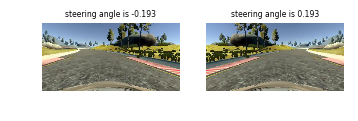

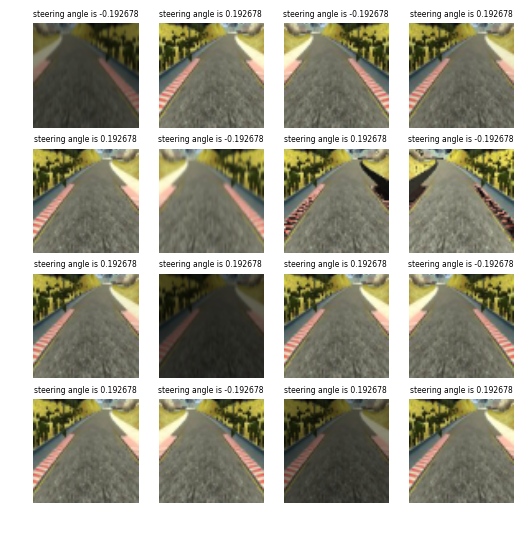

In [5]:
import csv
import math
import numpy as np
# np.random.seed(1987)
import scipy
import random
# random.seed(1987)
from random import shuffle
from PIL import Image
import json
import cv2
from scipy.ndimage.interpolation import zoom
from skimage import transform
import matplotlib.pyplot as plt
%matplotlib inline


def preprocess_img(image, new_size_col=64,new_size_row=64):
    image = np.asarray(image)
    shape = image.shape
    image = image[math.floor(shape[0]/3):shape[0]-25, 0:shape[1]]
    image = cv2.resize(image,(new_size_col,new_size_row),
                        interpolation=cv2.INTER_AREA)
    return image



def imgs_preprocesses(file_paths, row):
    ary = []
    for file_dir in file_paths:
        path="./data/"+row[file_dir]
        path=path.replace(" ","")
        img = Image.open(path)
        ary.append(img)
    return ary


def img_brightness_argumentation(img):
    img = np.asarray(img)
    hsv_img = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    random_bright = .35+np.random.uniform()
    hsv_img[:,:,2] = hsv_img[:,:,2]*random_bright
    return cv2.cvtColor(hsv_img,cv2.COLOR_HSV2RGB)


def img_bluring_argumentation(img):
    img = np.asarray(img)
    rand_blur_idx = random.choice([3,5,7,9])
    img = cv2.blur(img,(rand_blur_idx,rand_blur_idx)) if random.randint(0,1)==1 else img
    img = cv2.GaussianBlur(img,(rand_blur_idx,rand_blur_idx),0) if random.randint(0,1)==1 else img
    img = cv2.medianBlur(img,rand_blur_idx) if random.randint(0,1)==1 else img
    return img


def img_argumentation(arg_img):
    arg_img = img_brightness_argumentation(arg_img) if random.randint(0,1)==1 else arg_img
    arg_img = img_bluring_argumentation(arg_img) if random.randint(0,1)==1 else arg_img
    return arg_img

data_file = "./data/driving_log.csv"

copier = []

with open(data_file, mode='r') as csvfile:
    reader = csv.DictReader(csvfile)
    for itm in reader:
        copier.append(itm)

row = copier[random.randint(0, len(copier)-1)]

target_angl_data_cn = float(row['steering'])

camera_file_type = ["center"]
target_angl_data = [target_angl_data_cn]
imgs = [img_cn] = imgs_preprocesses(camera_file_type,row)

fliped_imgs = list(map(lambda img: np.fliplr(img), imgs[::]))
fliped_target_angl_data = [-1*target_angl_data_cn] 

all_imgs =imgs+fliped_imgs
all_steer_angl = target_angl_data+fliped_target_angl_data

fig_org = plt.figure()
for idx,img in enumerate(all_imgs):
    fig_org.add_subplot(2,3,idx+1)
    plt.axis('off')
    plt.title("steering angle is "+str(round(all_steer_angl[idx],3)),fontsize=5.5)
    plt.imshow(img)

fig = plt.figure()
for idx in range(16):
    rand_idx = random.randint(0,len(all_imgs)-1)
    img = img_argumentation(all_imgs[rand_idx])
    img = preprocess_img(img)
    fig.add_subplot(4,4,idx+1)
    plt.axis('off')
    plt.title("steering angle is "+str(round(all_steer_angl[rand_idx],6)),fontsize=5.5)
    plt.imshow(img)
    plt.subplots_adjust(left=0.1, right=0.9, top=1.2, bottom=0)
